In [996]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np

In [997]:
HOUSING_PATH_FULL='C:/Users/samys/PycharmProjects/HousingPrices/data/Melbourne_housing_FULL.csv'

def load_housing_data(housing_path=HOUSING_PATH_FULL):
    return pd.read_csv(housing_path)

In [998]:
loaded_data = load_housing_data()
loaded_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34857 entries, 0 to 34856
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         34857 non-null  object 
 1   Address        34857 non-null  object 
 2   Rooms          34857 non-null  int64  
 3   Type           34857 non-null  object 
 4   Price          27247 non-null  float64
 5   Method         34857 non-null  object 
 6   SellerG        34857 non-null  object 
 7   Date           34857 non-null  object 
 8   Distance       34856 non-null  float64
 9   Postcode       34856 non-null  float64
 10  Bedroom2       26640 non-null  float64
 11  Bathroom       26631 non-null  float64
 12  Car            26129 non-null  float64
 13  Landsize       23047 non-null  float64
 14  BuildingArea   13742 non-null  float64
 15  YearBuilt      15551 non-null  float64
 16  CouncilArea    34854 non-null  object 
 17  Lattitude      26881 non-null  float64
 18  Longti

In [999]:
train_val_set = loaded_data.dropna(subset=['Price'])
final_test = loaded_data[loaded_data['Price'].isna()]

new_column_names = {'Lattitude': 'Latitude', 'Longtitude': 'Longitude'}
melb_data = train_val_set.rename(columns=new_column_names)

In [1000]:
def remove_outliers_iqr_all(df, columns, factor=1.5):
    df_clean = df.copy()
    for col in columns:
        Q1 = df_clean[col].quantile(0.25)
        Q3 = df_clean[col].quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - factor * IQR
        upper = Q3 + factor * IQR
        outliers = df_clean[(df_clean[col] < lower) | (df_clean[col] > upper)]
        print(f"Number of outliers in {col}: {len(outliers)}")
        df_clean = df_clean[(df_clean[col] >= lower) & (df_clean[col] <= upper)]
    return df_clean

In [1001]:
cols = ['Price', 'Rooms', 'Bedroom2', 'Bathroom']
melb_data = remove_outliers_iqr_all(melb_data, cols)

Number of outliers in Price: 1278
Number of outliers in Rooms: 1029
Number of outliers in Bedroom2: 41
Number of outliers in Bathroom: 40


In [1002]:
train_set, test_set = train_test_split(melb_data, test_size=0.2, random_state=42)
train_set.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15017 entries, 10049 to 28704
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         15017 non-null  object 
 1   Address        15017 non-null  object 
 2   Rooms          15017 non-null  int64  
 3   Type           15017 non-null  object 
 4   Price          15017 non-null  float64
 5   Method         15017 non-null  object 
 6   SellerG        15017 non-null  object 
 7   Date           15017 non-null  object 
 8   Distance       15017 non-null  float64
 9   Postcode       15017 non-null  float64
 10  Bedroom2       15017 non-null  float64
 11  Bathroom       15017 non-null  float64
 12  Car            14725 non-null  float64
 13  Landsize       13000 non-null  float64
 14  BuildingArea   7576 non-null   float64
 15  YearBuilt      8645 non-null   float64
 16  CouncilArea    15017 non-null  object 
 17  Latitude       15000 non-null  float64
 18  Longitu

In [1003]:

train_set['Price'] = np.log1p(train_set['Price'])
test_set['Price'] = np.log1p(test_set['Price'])


In [1004]:
housing = train_set.copy()
numerical_features = train_set.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_features = train_set.select_dtypes(include=['object']).columns.tolist()

print("Numerical features:", numerical_features)
print("Categorical features:", categorical_features)


Numerical features: ['Rooms', 'Price', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car', 'Landsize', 'BuildingArea', 'YearBuilt', 'Latitude', 'Longitude', 'Propertycount']
Categorical features: ['Suburb', 'Address', 'Type', 'Method', 'SellerG', 'Date', 'CouncilArea', 'Regionname']


array([[<Axes: title={'center': 'Rooms'}>,
        <Axes: title={'center': 'Price'}>,
        <Axes: title={'center': 'Distance'}>,
        <Axes: title={'center': 'Postcode'}>],
       [<Axes: title={'center': 'Bedroom2'}>,
        <Axes: title={'center': 'Bathroom'}>,
        <Axes: title={'center': 'Car'}>,
        <Axes: title={'center': 'Landsize'}>],
       [<Axes: title={'center': 'BuildingArea'}>,
        <Axes: title={'center': 'YearBuilt'}>,
        <Axes: title={'center': 'Latitude'}>,
        <Axes: title={'center': 'Longitude'}>],
       [<Axes: title={'center': 'Propertycount'}>, <Axes: >, <Axes: >,
        <Axes: >]], dtype=object)

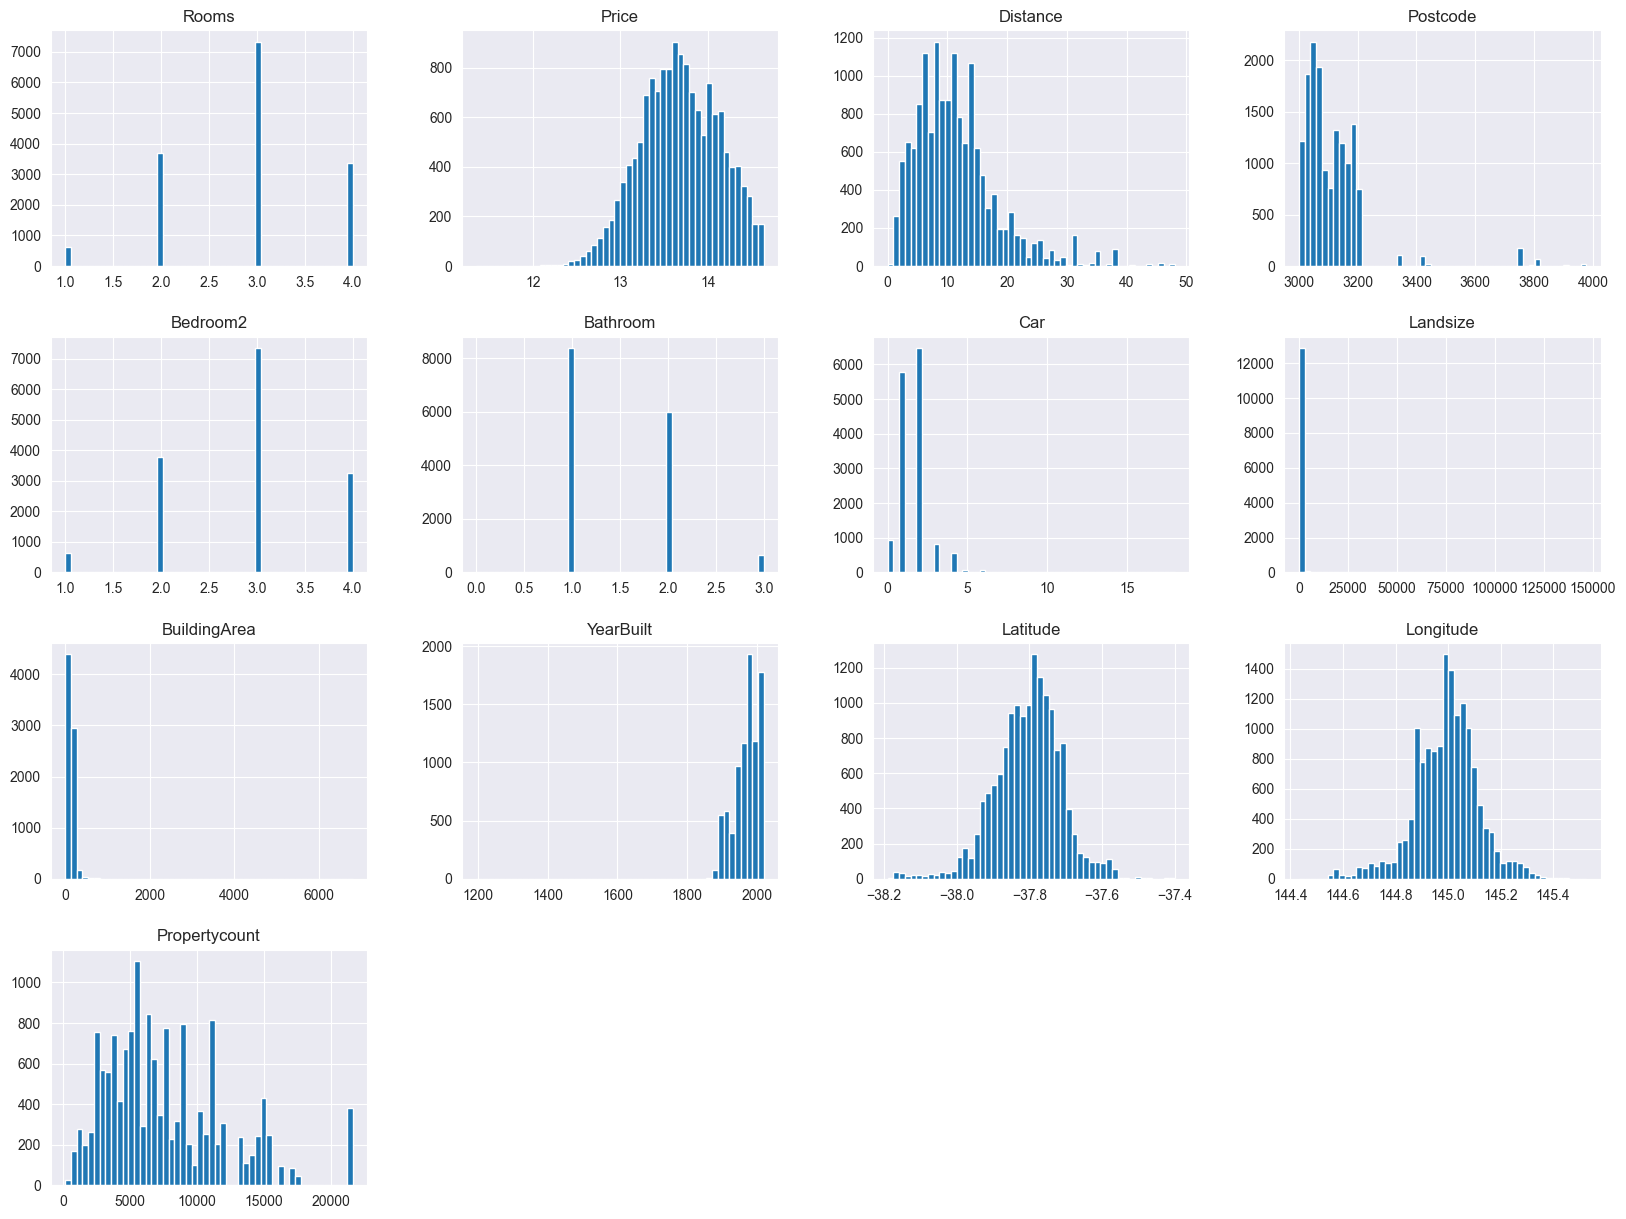

In [1005]:
housing_num = housing[numerical_features]
housing.hist(bins=50, figsize=(20, 15))

In [1006]:
corr_matrix = housing_num.corr()
corr_matrix["Price"].sort_values(ascending=False)

Price            1.000000
Rooms            0.444518
Bedroom2         0.432617
Bathroom         0.301569
BuildingArea     0.263569
Longitude        0.250591
Car              0.165949
Landsize         0.025603
Postcode        -0.007781
Propertycount   -0.082686
Distance        -0.224214
Latitude        -0.225343
YearBuilt       -0.382245
Name: Price, dtype: float64

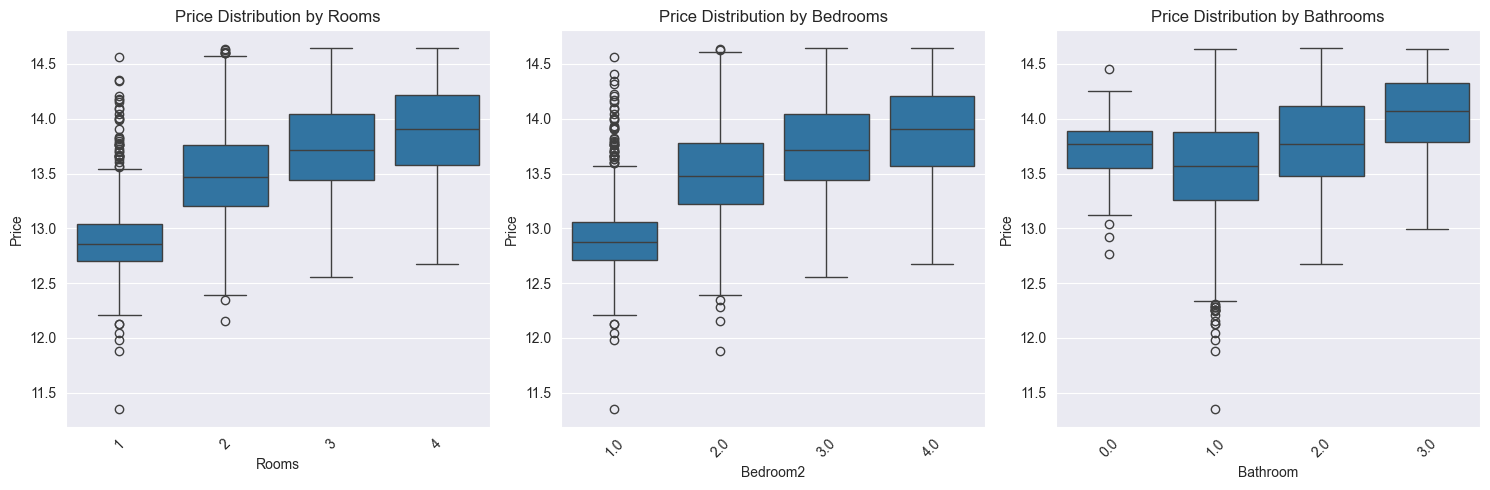

In [1007]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Price vs Rooms
sns.boxplot(data=housing, x='Rooms', y='Price', ax=axes[0])
axes[0].set_title('Price Distribution by Rooms')
axes[0].tick_params(axis='x', rotation=45)

# Price vs Bedrooms
sns.boxplot(data=housing, x='Bedroom2', y='Price', ax=axes[1])
axes[1].set_title('Price Distribution by Bedrooms')
axes[1].tick_params(axis='x', rotation=45)

# Price vs Bathrooms
sns.boxplot(data=housing, x='Bathroom', y='Price', ax=axes[2])
axes[2].set_title('Price Distribution by Bathrooms')
axes[2].tick_params(axis='x', rotation=45)

plt.tight_layout()

In [1008]:
housing.info()


<class 'pandas.core.frame.DataFrame'>
Index: 15017 entries, 10049 to 28704
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         15017 non-null  object 
 1   Address        15017 non-null  object 
 2   Rooms          15017 non-null  int64  
 3   Type           15017 non-null  object 
 4   Price          15017 non-null  float64
 5   Method         15017 non-null  object 
 6   SellerG        15017 non-null  object 
 7   Date           15017 non-null  object 
 8   Distance       15017 non-null  float64
 9   Postcode       15017 non-null  float64
 10  Bedroom2       15017 non-null  float64
 11  Bathroom       15017 non-null  float64
 12  Car            14725 non-null  float64
 13  Landsize       13000 non-null  float64
 14  BuildingArea   7576 non-null   float64
 15  YearBuilt      8645 non-null   float64
 16  CouncilArea    15017 non-null  object 
 17  Latitude       15000 non-null  float64
 18  Longitu

In [1009]:
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Удаляем колонки с большим количеством пропусков
drop_cols = ["BuildingArea", "YearBuilt", "Postcode", "Latitude", "Longitude", "Address"]
housing_clean = housing.drop(columns=drop_cols)

# Удаляем строки с пропусками в важных признаках
important_dropna_cols = ["Distance", "CouncilArea", "Regionname"]
housing_clean = housing_clean.dropna(subset=important_dropna_cols)

# Колонки для импутации
median_impute_cols = ["Bedroom2", "Bathroom", "Car", "Landsize"]
mean_impute_cols = ["Propertycount"]

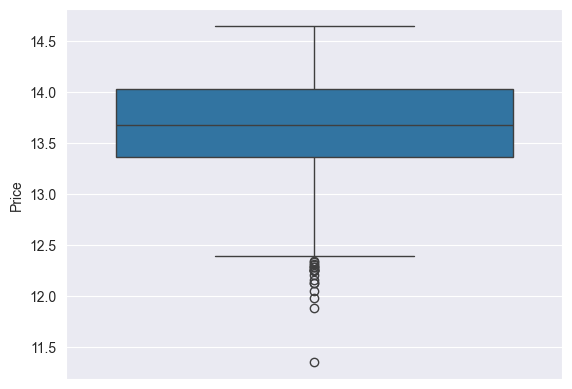

In [1010]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(data=housing_clean, y='Price')
plt.show()

In [1011]:
# cols = ['Price', 'Rooms', 'Bedroom2', 'Bathroom']
# housing_clean = remove_outliers_iqr_all(housing_clean, cols)
# test_set = remove_outliers_iqr_all(test_set, cols)

# housing_clean['Price'] = np.log1p(housing_clean['Price'])

In [1012]:
from sklearn.preprocessing import OneHotEncoder

# Создаём имьютеры
median_imputer = SimpleImputer(strategy="median")
mean_imputer = SimpleImputer(strategy="mean")

# Объединяем их в ColumnTransformer
imputer_transform = ColumnTransformer(transformers=[
    ("median_imputer", median_imputer, median_impute_cols),
    ("mean_imputer", mean_imputer, mean_impute_cols)
],
    remainder="passthrough",
    verbose_feature_names_out=False)  # остальные признаки остаются как есть

numerical_cols = housing_clean.select_dtypes(include=['int64', 'float64']).columns.drop('Price').tolist()
categorical_cols = housing_clean.drop(columns=numerical_cols + ['Price']).columns.tolist()

print("Numerical columns:", numerical_cols)
print("Categorical columns:", categorical_cols)

numeric_transformer = Pipeline(steps=[
    ('imputer_transform', imputer_transform),  # замена NaN на среднее
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('encoder', OneHotEncoder(handle_unknown='ignore'
                              # , sparse_output=False
))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ]
)

pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
])


Numerical columns: ['Rooms', 'Distance', 'Bedroom2', 'Bathroom', 'Car', 'Landsize', 'Propertycount']
Categorical columns: ['Suburb', 'Type', 'Method', 'SellerG', 'Date', 'CouncilArea', 'Regionname']


In [1013]:
X_train = housing_clean.drop(columns=["Price"])
Y_train = housing_clean["Price"]

# from sklearn import set_config
# set_config(transform_output="pandas")

X_train_transformed = pipeline.fit_transform(X_train)

# X_prepared_df = pd.DataFrame(X_prepared)
# X_prepared_df.info()

In [1014]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression

test_set_clean = test_set.drop(columns=drop_cols)
test_set_clean = test_set_clean.dropna(subset=important_dropna_cols)


X_test = test_set_clean.drop(columns=["Price"])
Y_test = test_set_clean["Price"]
print(Y_test[:20])

X_test_transformed = pipeline.transform(test_set_clean)

import seaborn as sns
import matplotlib.pyplot as plt

20494    14.285515
22949    14.319312
3560     14.046623
4993     13.369225
33678    13.761583
34215    13.279369
15057    14.081714
33796    13.451669
22774    12.847929
15521    14.425277
12394    13.629182
24488    14.253766
20703    14.187075
13246    13.235694
29441    13.996165
1667     13.362955
6711     13.384729
21804    13.592368
19373    13.811504
25510    14.285515
Name: Price, dtype: float64


In [1015]:
# Создаем модель линейной регрессии
model = LinearRegression()

In [1016]:
# Обучаем модель на обучающих данных
model.fit(X_train_transformed, Y_train)


LinearRegression()

In [1017]:
y_pred_log = model.predict(X_test_transformed)

# Затем используем его
print(y_pred_log[:20])
print(y_pred_log[:20])

y_pred = np.expm1(y_pred_log)
y_true = np.expm1(Y_test)

# y_pred = y_pred_log
# y_true = Y_test


[14.293184   14.26596681 13.88082094 13.22020594 13.66829326 13.27711358
 13.33436994 13.45995602 13.19102013 14.13766579 13.6869265  14.25739123
 14.13113201 13.18513503 14.23758675 13.28692516 13.53067232 13.33140986
 13.63916189 14.26666719]
[14.293184   14.26596681 13.88082094 13.22020594 13.66829326 13.27711358
 13.33436994 13.45995602 13.19102013 14.13766579 13.6869265  14.25739123
 14.13113201 13.18513503 14.23758675 13.28692516 13.53067232 13.33140986
 13.63916189 14.26666719]


In [1018]:
# Оценка ошибки модели


mae = mean_absolute_error(y_true, y_pred)
mse = mean_squared_error(y_true, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_true, y_pred)

# Выводим результаты
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R²: {r2}")


Mean Absolute Error (MAE): 151412.88591564095
Mean Squared Error (MSE): 44604949669.47248
Root Mean Squared Error (RMSE): 211198.83917643223
R²: 0.7571045837665885
